In [28]:
import matplotlib.pyplot as plt
from datetime import datetime

def plot_timestamps(file_path, bar_width=0.8, xtick_interval=5, start_time=None, end_time=None):
    """
    Load a file of UNIX timestamps and plot vertical bars spaced evenly, with an optional time range filter.

    Parameters:
        file_path (str): Path to the text file containing UNIX timestamps.
        bar_width (float): Width of the vertical bars.
        xtick_interval (int): Interval between x-ticks on the plot.
        start_time (str): Start time in HH:MM format to filter timestamps (e.g., '12:00').
        end_time (str): End time in HH:MM format to filter timestamps (e.g., '14:00').
    """
    # Load timestamps from file
    with open(file_path, 'r') as file:
        timestamps = [float(line.strip()) for line in file if line.strip()]

    # Convert timestamps to readable time (HH:MM)
    readable_times = [datetime.utcfromtimestamp(ts).strftime('%H:%M') for ts in timestamps]

    # Filter timestamps based on the provided time range
    if start_time and end_time:
        start_datetime = datetime.strptime(start_time, '%H:%M')
        end_datetime = datetime.strptime(end_time, '%H:%M')
        filtered_indices = [
            i for i, t in enumerate(readable_times)
            if start_datetime <= datetime.strptime(t, '%H:%M') <= end_datetime
        ]
        timestamps = [timestamps[i] for i in filtered_indices]
        readable_times = [readable_times[i] for i in filtered_indices]

    # Create indices for spacing
    indices = range(len(timestamps))

    # Plot the timestamps as vertical bars
    plt.figure(figsize=(15, 6))
    for idx in indices:
        plt.axvline(x=idx, color='black', linestyle='-', alpha=0.5, linewidth=bar_width)

    # Reduce x-ticks and set labels
    plt.xticks(indices[::xtick_interval], 
               labels=[readable_times[i] for i in indices[::xtick_interval]], 
               rotation=45, fontsize=8)

    # Adding labels for clarity
    plt.title('Timestamps Visualization')
    plt.xlabel('Event Index')
    plt.ylabel('Readable Time (HH:MM)')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Plot all timestamps
# plot_timestamps('./22_MC8timestamps.txt', bar_width=1.5, xtick_interval=10)

# # Plot timestamps within a specific time range
# plot_timestamps('./22_MC8timestamps.txt', bar_width=1.5, xtick_interval=10, start_time='12:00', end_time='14:00')


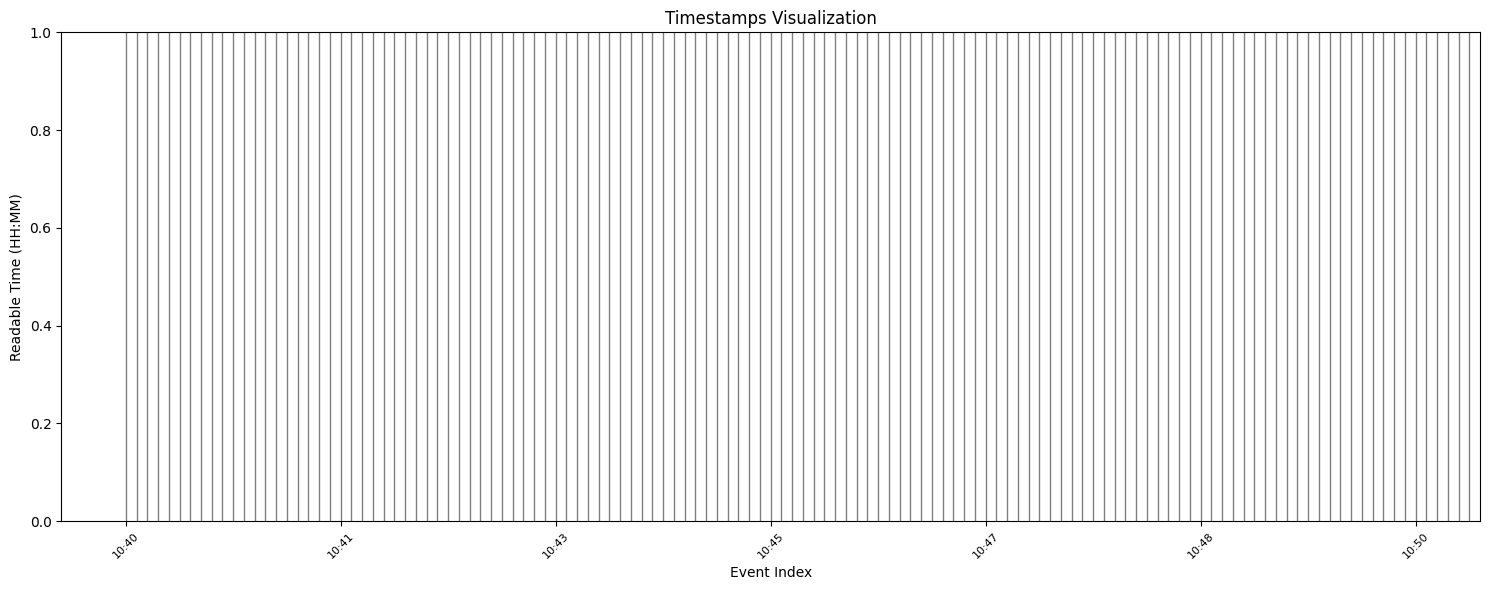

In [35]:
plot_timestamps('./22_MC8timestamps.txt', bar_width=1, xtick_interval=20, start_time='10:40', end_time='10:50')


In [36]:
import numpy as np

def calculate_avg_and_std(file_path):
    """
    Calculate the average difference and standard deviation between consecutive data points.

    Parameters:
        file_path (str): Path to the text file containing UNIX timestamps.

    Returns:
        tuple: A tuple containing the average difference and standard deviation.
    """
    # Load timestamps from file
    with open(file_path, 'r') as file:
        timestamps = [float(line.strip()) for line in file if line.strip()]

    # Calculate differences between consecutive timestamps
    differences = np.diff(timestamps)

    # Calculate average and standard deviation
    avg_difference = np.mean(differences)
    std_difference = np.std(differences)

    return avg_difference, std_difference

# Example usage:
avg_diff, std_diff = calculate_avg_and_std('./22_MC8timestamps.txt')
print(f"Average Difference: {avg_diff}")
print(f"Standard Deviation: {std_diff}")


Average Difference: 5.579560791737035
Standard Deviation: 14.153648358550065


In [99]:
import matplotlib.pyplot as plt
from datetime import datetime

def plot_timestamps_actual_spacing(file_path, bar_width=1, xtick_interval=20, start_time=None, end_time=None):
    """
    Plot vertical bars with actual spacing between timestamps.

    Parameters:
        file_path (str): Path to the text file containing UNIX timestamps.
        bar_width (float): Width of the vertical bars.
        xtick_interval (int): Interval between x-ticks on the plot.
        start_time (str): Start time in HH:MM format to filter timestamps (e.g., '10:00').
        end_time (str): End time in HH:MM format to filter timestamps (e.g., '12:00').
    """
    # Load timestamps from file
    with open(file_path, 'r') as file:
        timestamps = [float(line.strip()) for line in file if line.strip()]

    # Convert timestamps to readable time (HH:MM)
    readable_times = [datetime.utcfromtimestamp(ts).strftime('%H:%M') for ts in timestamps]

    # Filter timestamps based on the provided time range
    if start_time and end_time:
        start_datetime = datetime.strptime(start_time, '%H:%M')
        end_datetime = datetime.strptime(end_time, '%H:%M')
        filtered_indices = [
            i for i, t in enumerate(readable_times)
            if start_datetime <= datetime.strptime(t, '%H:%M') <= end_datetime
        ]
        timestamps = [timestamps[i] for i in filtered_indices]
        readable_times = [readable_times[i] for i in filtered_indices]

    # Normalise timestamps to start from 0
    min_timestamp = min(timestamps) if timestamps else 0
    normalised_timestamps = [ts - min_timestamp for ts in timestamps]

    # Plot the timestamps as vertical bars
    plt.figure(figsize=(15, 6))
    for ts in normalised_timestamps:
        plt.axvline(x=ts, color='black', linestyle='-', alpha=0.5, linewidth=bar_width)

    # Adjust x-ticks dynamically
    xtick_positions = normalised_timestamps[::xtick_interval] if xtick_interval > 0 else normalised_timestamps
    xtick_labels = readable_times[::xtick_interval] if xtick_interval > 0 else readable_times
    plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45, fontsize=8)

    # Adding labels for clarity
    plt.title('Timestamps Visualization (Normalised Spacing)')
    plt.xlabel('Time (Relative to First Timestamp)')
    plt.ylabel('Readable Time (HH:MM)')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_timestamps_actual_spacing('./22_MC8timestamps.txt', bar_width=1, xtick_interval=20, start_time='10:00', end_time='12:00')


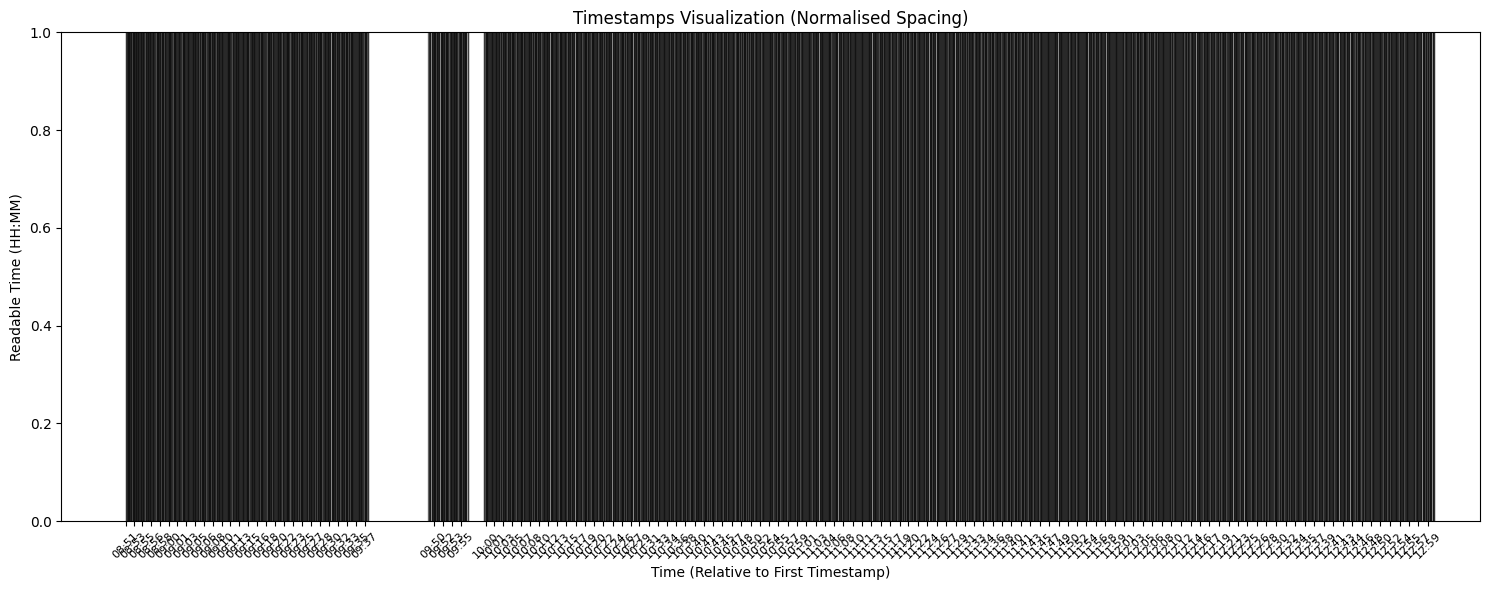

In [102]:
plot_timestamps_actual_spacing('./22_MC8timestamps.txt')


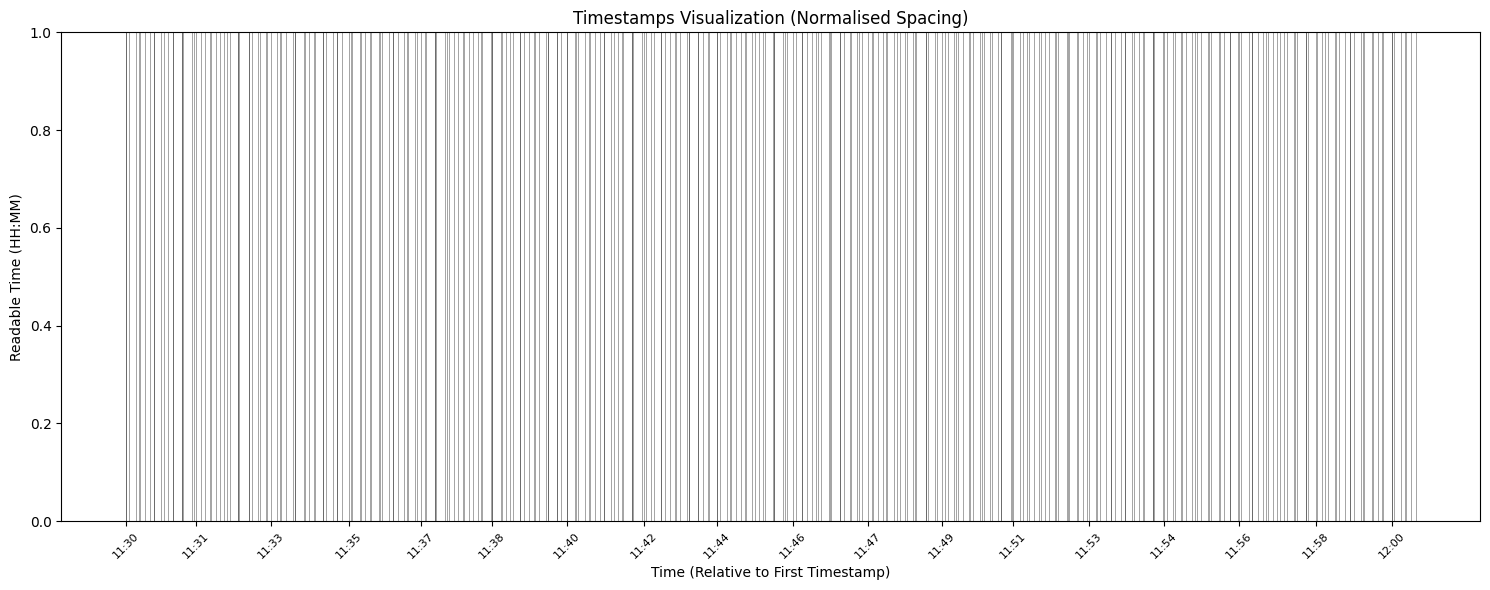

In [89]:
plot_timestamps_actual_spacing('./22_MC8timestamps.txt', bar_width=0.5, start_time='11:30', end_time='12:00')


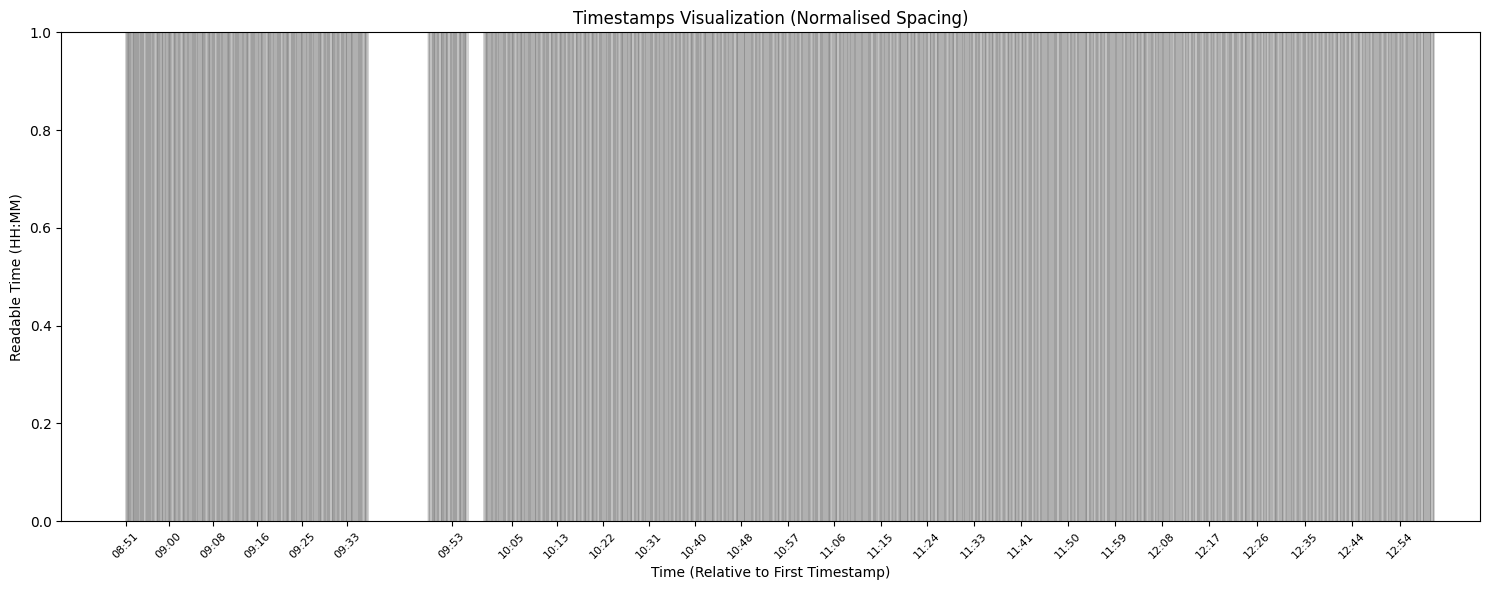

In [108]:
plot_timestamps_actual_spacing('./22_MC8timestamps.txt', bar_width=0.25, start_time='8:00', end_time='18:30',xtick_interval=100)


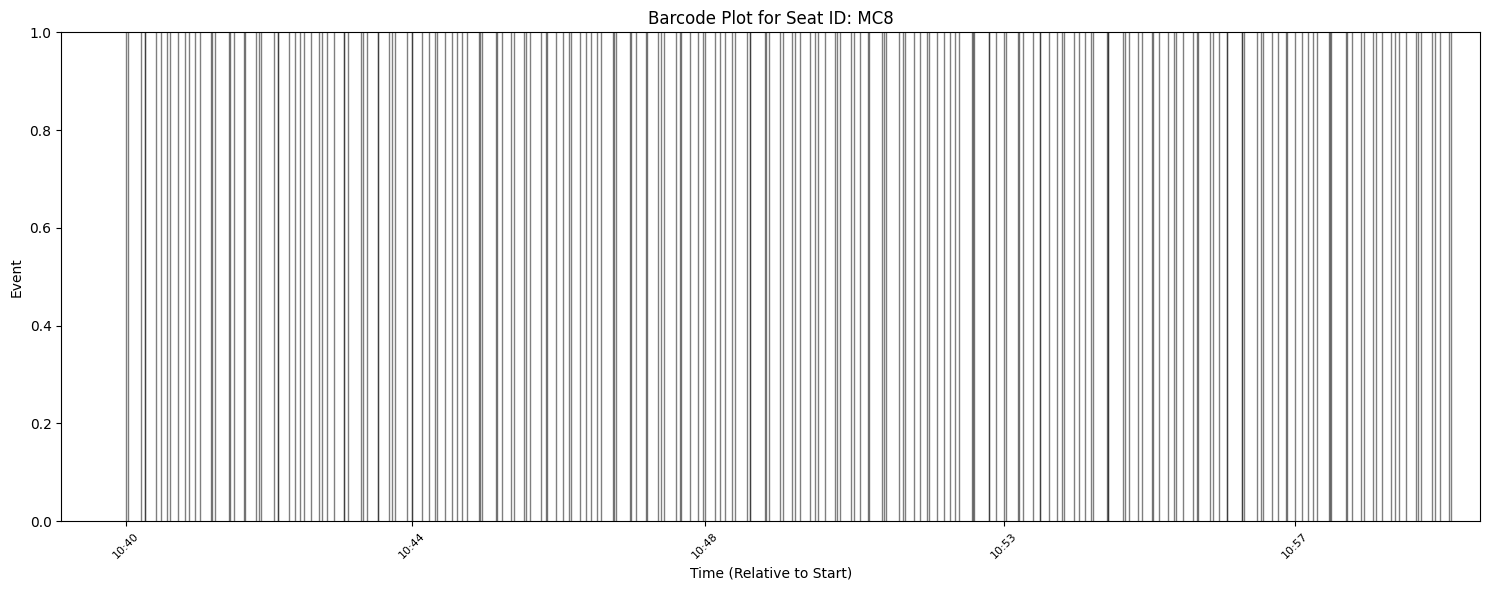

In [71]:
import matplotlib.pyplot as plt
import json
from datetime import datetime

def load_timestamps_from_file(file_path, seat_id, day, start_time=None, end_time=None):
    """
    Load the text file, parse it for a given seat ID, and extract timestamps where the seat ID appeared.

    Args:
        file_path (str): Path to the JSON line-separated text file.
        seat_id (str): The seat ID to filter by.
        day (str): Date of the file in 'YYYY-MM-DD' format.
        start_time (str): Start time in 'HH:MM:SS' format.
        end_time (str): End time in 'HH:MM:SS' format.

    Returns:
        list: A list of timestamps (acp_ts) where the seat ID was detected within the timeframe.
    """
    timestamps = []

    # Convert start and end times to UNIX timestamps
    start_timestamp = (
        datetime.strptime(f"{day} {start_time}", "%Y-%m-%d %H:%M").timestamp() if start_time else None
    )
    end_timestamp = (
        datetime.strptime(f"{day} {end_time}", "%Y-%m-%d %H:%M").timestamp() if end_time else None
    )

    # Load and parse the file
    with open(file_path, 'r') as file:
        for line in file:
            try:
                data = json.loads(line)
                ts = float(data['acp_ts'])
                if seat_id in data.get('seats_occupied', []) and (
                    start_timestamp is None or ts >= start_timestamp
                ) and (end_timestamp is None or ts <= end_timestamp):
                    timestamps.append(ts)
            except json.JSONDecodeError as e:
                print(f"Skipping invalid JSON line: {line.strip()}\nError: {e}")
    
    return timestamps

def plot_seat_barcode(file_path, seat_id, day, bar_width=1, xtick_interval=10, start_time=None, end_time=None):
    """
    Load timestamps for a given seat ID and plot them as a barcode, optionally filtering by a timeframe.

    Args:
        file_path (str): Path to the JSON line-separated text file.
        seat_id (str): The seat ID to filter by.
        day (str): Date of the file in 'YYYY-MM-DD' format.
        bar_width (float): Width of the vertical bars.
        xtick_interval (int): Interval for x-ticks to avoid overcrowding.
        start_time (str): Start time in 'HH:MM:SS' format.
        end_time (str): End time in 'HH:MM:SS' format.
    """
    timestamps = load_timestamps_from_file(file_path, seat_id, day, start_time, end_time)

    if not timestamps:
        print(f"No data found for seat ID: {seat_id} in the specified timeframe.")
        return

    # Normalise timestamps to start from 0
    min_timestamp = min(timestamps)
    normalised_timestamps = [ts - min_timestamp for ts in timestamps]

    # Plot the timestamps as barcodes
    plt.figure(figsize=(15, 6))
    for ts in normalised_timestamps:
        plt.axvline(x=ts, color='black', linestyle='-', alpha=0.5, linewidth=bar_width)

    # Set x-ticks at regular intervals
    xtick_positions = normalised_timestamps[::xtick_interval] if xtick_interval > 0 else normalised_timestamps
    xtick_labels = [datetime.fromtimestamp(ts + min_timestamp).strftime('%H:%M') for ts in xtick_positions]
    plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45, fontsize=8)

    # Adding labels and grid for clarity
    plt.title(f"Barcode Plot for Seat ID: {seat_id}")
    plt.xlabel('Time (Relative to Start)')
    plt.ylabel('Event')
    plt.tight_layout()
    plt.show()

# Example usage:
day = '2024-01-22'
file_path = './node_22-28Jan/cerberus-node-lt1_'+day+'.txt'
seat_id = 'MC8'
start_time = '10:40'
end_time = '11:00'
plot_seat_barcode(file_path, seat_id, day, bar_width=1, xtick_interval=50, start_time=start_time, end_time=end_time)


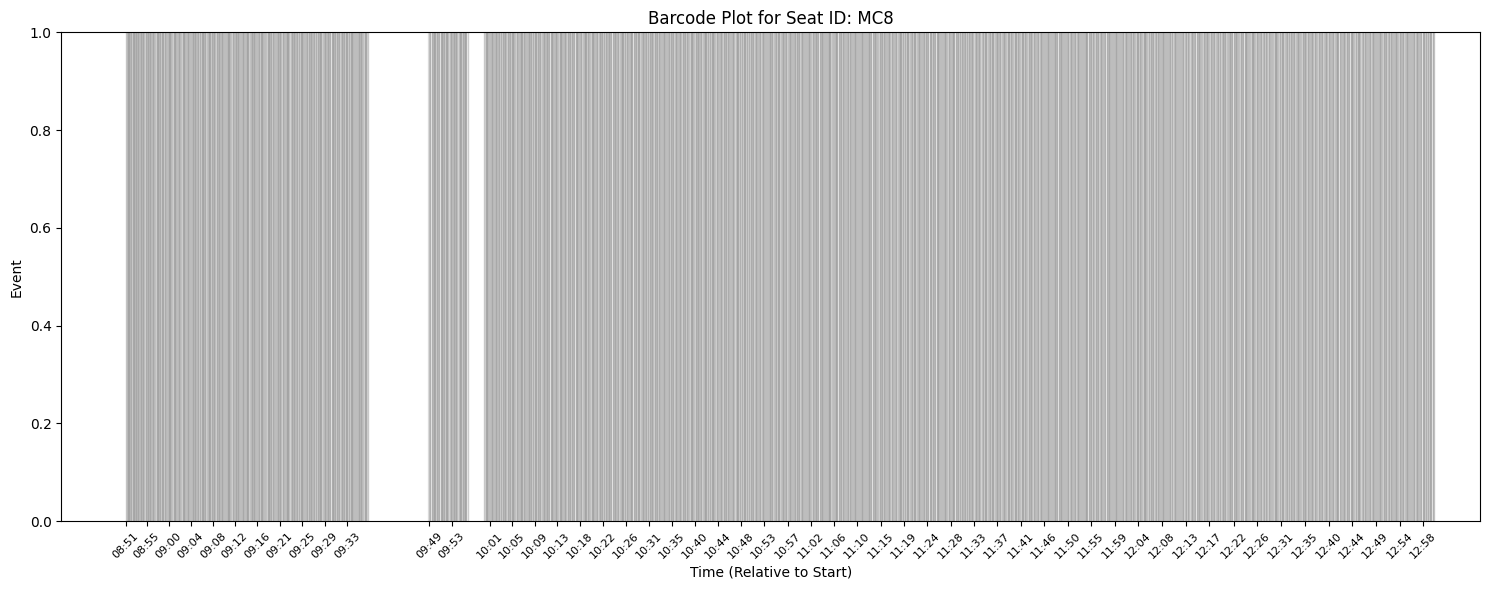

In [83]:
import matplotlib.pyplot as plt
import json
from datetime import datetime

def load_all_timestamps_from_json(file_path, seat_id):
    """
    Load all timestamps from the JSON file for a given seat ID.

    Args:
        file_path (str): Path to the JSON file.
        seat_id (str): The seat ID to filter by.

    Returns:
        list: A list of all timestamps for the seat ID.
    """
    # Load the file and extract timestamps for the specified seat ID
    with open(file_path, 'r') as file:
        data = json.load(file)

    timestamps = data.get(seat_id, [])
    return timestamps

def plot_all_seat_barcode(file_path, seat_id, bar_width=1, xtick_interval=10):
    """
    Plot all timestamps for a given seat ID from a JSON file as a barcode.

    Args:
        file_path (str): Path to the JSON file.
        seat_id (str): The seat ID to filter by.
        bar_width (float): Width of the vertical bars.
        xtick_interval (int): Interval for x-ticks to avoid overcrowding.
    """
    timestamps = load_all_timestamps_from_json(file_path, seat_id)

    if not timestamps:
        print(f"No data found for seat ID: {seat_id}.")
        return

    # Normalise timestamps to start from 0
    min_timestamp = min(timestamps)
    normalised_timestamps = [ts - min_timestamp for ts in timestamps]

    # Plot the timestamps as barcodes
    plt.figure(figsize=(15, 6))
    for ts in normalised_timestamps:
        plt.axvline(x=ts, color='black', linestyle='-', alpha=0.1, linewidth=bar_width)

    # Set x-ticks at regular intervals
    xtick_positions = normalised_timestamps[::xtick_interval] if xtick_interval > 0 else normalised_timestamps
    xtick_labels = [datetime.fromtimestamp(ts + min_timestamp).strftime('%H:%M') for ts in xtick_positions]
    plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45, fontsize=8)

    # Adding labels and grid for clarity
    plt.title(f"Barcode Plot for Seat ID: {seat_id}")
    plt.xlabel('Time (Relative to Start)')
    plt.ylabel('Event')
    plt.tight_layout()
    plt.show()

# Example usage:
file_path = './22_seatTS.json'
seat_id = 'MC8'
plot_all_seat_barcode(file_path, seat_id, bar_width=1, xtick_interval=50)


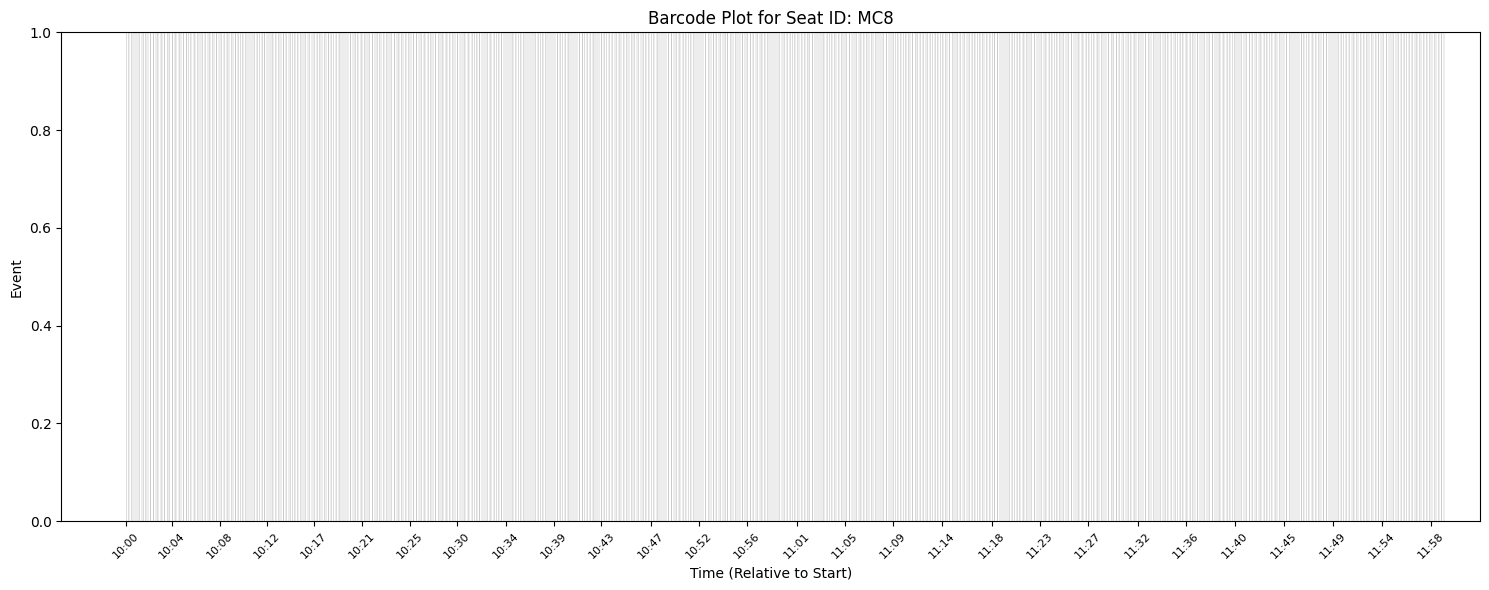

In [86]:
import matplotlib.pyplot as plt
import json
from datetime import datetime

def load_filtered_timestamps_from_json(file_path, seat_id, day, start_time=None, end_time=None):
    """
    Load and filter timestamps from the JSON file for a given seat ID based on a timeframe.

    Args:
        file_path (str): Path to the JSON file.
        seat_id (str): The seat ID to filter by.
        day (str): The date in 'YYYY-MM-DD' format to align the start and end times.
        start_time (str): Start time in 'HH:MM' format.
        end_time (str): End time in 'HH:MM' format.

    Returns:
        list: A list of filtered timestamps for the seat ID.
    """
    # Convert start and end times to UNIX timestamps for the specified day
    start_timestamp = (
        datetime.strptime(f"{day} {start_time}", "%Y-%m-%d %H:%M").timestamp() if start_time else None
    )
    end_timestamp = (
        datetime.strptime(f"{day} {end_time}", "%Y-%m-%d %H:%M").timestamp() if end_time else None
    )

    # Load the file and extract timestamps for the specified seat ID
    with open(file_path, 'r') as file:
        data = json.load(file)

    timestamps = data.get(seat_id, [])
    if not timestamps:
        return []

    # Filter timestamps by the specified time range
    if start_timestamp is not None:
        timestamps = [ts for ts in timestamps if ts >= start_timestamp]
    if end_timestamp is not None:
        timestamps = [ts for ts in timestamps if ts <= end_timestamp]
    
    return timestamps

def plot_filtered_seat_barcode(file_path, seat_id, day, bar_width=1, xtick_interval=10, start_time=None, end_time=None):
    """
    Plot filtered timestamps for a given seat ID from a JSON file as a barcode.

    Args:
        file_path (str): Path to the JSON file.
        seat_id (str): The seat ID to filter by.
        day (str): The date in 'YYYY-MM-DD' format to align the start and end times.
        bar_width (float): Width of the vertical bars.
        xtick_interval (int): Interval for x-ticks to avoid overcrowding.
        start_time (str): Start time in 'HH:MM' format.
        end_time (str): End time in 'HH:MM' format.
    """
    timestamps = load_filtered_timestamps_from_json(file_path, seat_id, day, start_time, end_time)

    if not timestamps:
        print(f"No data found for seat ID: {seat_id} in the specified timeframe.")
        return

    # Normalise timestamps to start from 0
    min_timestamp = min(timestamps)
    normalised_timestamps = [ts - min_timestamp for ts in timestamps]

    # Plot the timestamps as barcodes
    plt.figure(figsize=(15, 6))
    for ts in normalised_timestamps:
        plt.axvline(x=ts, color='black', linestyle='-', alpha=0.1, linewidth=bar_width)

    # Set x-ticks at regular intervals
    xtick_positions = normalised_timestamps[::xtick_interval] if xtick_interval > 0 else normalised_timestamps
    xtick_labels = [datetime.fromtimestamp(ts + min_timestamp).strftime('%H:%M') for ts in xtick_positions]
    plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45, fontsize=8)

    # Adding labels and grid for clarity
    plt.title(f"Barcode Plot for Seat ID: {seat_id}")
    plt.xlabel('Time (Relative to Start)')
    plt.ylabel('Event')
    plt.tight_layout()
    plt.show()

# Example usage:
file_path = './22_seatTS.json'
seat_id = 'MC8'
day = '2024-01-22'
start_time = '10:00'
end_time = '12:00'
plot_filtered_seat_barcode(file_path, seat_id, day, bar_width=0.5, xtick_interval=50, start_time=start_time, end_time=end_time)


In [129]:
import matplotlib.pyplot as plt
from datetime import datetime

def plot_barcodes_from_file(
    file_path, 
    bar_width=1, 
    height=10, 
    xtick_interval=20, 
    start_time=None, 
    end_time=None
):
    """
    Plot barcodes with actual spacing between timestamps.

    Parameters:
        file_path (str): Path to the text file containing UNIX timestamps.
        bar_width (float): Width of the vertical bars.
        height (float): Height of the barcode bars.
        xtick_interval (int): Interval between x-ticks on the plot.
        start_time (str): Start time in HH:MM format to filter timestamps (e.g., '10:00').
        end_time (str): End time in HH:MM format to filter timestamps (e.g., '12:00').
    """
    # Load timestamps from file
    with open(file_path, 'r') as file:
        timestamps = [float(line.strip()) for line in file if line.strip()]

    # Convert timestamps to readable time (HH:MM)
    readable_times = [datetime.utcfromtimestamp(ts).strftime('%H:%M') for ts in timestamps]

    # Filter timestamps based on the provided time range
    if start_time and end_time:
        start_datetime = datetime.strptime(start_time, '%H:%M')
        end_datetime = datetime.strptime(end_time, '%H:%M')
        filtered_indices = [
            i for i, t in enumerate(readable_times)
            if start_datetime <= datetime.strptime(t, '%H:%M') <= end_datetime
        ]
        timestamps = [timestamps[i] for i in filtered_indices]
        readable_times = [readable_times[i] for i in filtered_indices]

    # Normalise timestamps to start from 0
    min_timestamp = min(timestamps) if timestamps else 0
    normalised_timestamps = [ts - min_timestamp for ts in timestamps]

    # Plot the barcodes
    plt.figure(figsize=(8, 3))
    for ts in normalised_timestamps:
        plt.bar(ts, height, width=bar_width, align='center', color='black', alpha=0.5)

    # Adjust x-ticks dynamically
    xtick_positions = normalised_timestamps[::xtick_interval] if xtick_interval > 0 else normalised_timestamps
    xtick_labels = readable_times[::xtick_interval] if xtick_interval > 0 else readable_times
    plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45, fontsize=8)

    # Adding labels and title for clarity
    plt.title('Barcode Plot of Timestamps')
    plt.xlabel('Time (Relative to First Timestamp)')
    plt.ylabel('Detection Height')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_barcodes_from_file('./22_MC8timestamps.txt', bar_width=1, xtick_interval=20, start_time='10:00', end_time='12:00')


In [138]:
xticks=50
t_start='10:00'
t_finish='13:00'
bar_w=4

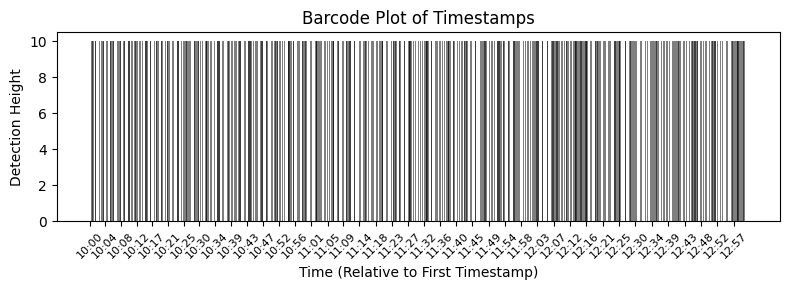

In [139]:
plot_barcodes_from_file('./22_MD8timestamps.txt', bar_width=bar_w, xtick_interval=xticks, start_time=t_start, end_time=t_finish)


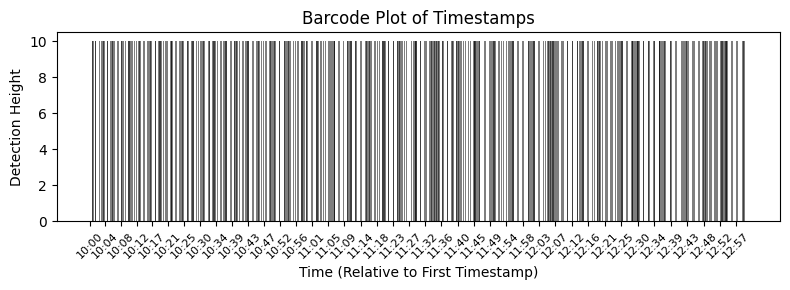

In [140]:
plot_barcodes_from_file('./22_MG8timestamps.txt',bar_width=bar_w, xtick_interval=xticks, start_time=t_start, end_time=t_finish)


In [156]:
import matplotlib.pyplot as plt
from datetime import datetime

def plot_barcodes_with_density(
    file_path, 
    bar_width=4, 
    height=20, 
    xtick_interval=50, 
    chunk_size=60, 
    density_color='blue', 
    density_label='Occupancy density',
    start_time=None, 
    end_time=None
):
    """
    Plot barcodes with actual spacing between timestamps and overlay density.

    Parameters:
        file_path (str): Path to the text file containing UNIX timestamps.
        bar_width (float): Width of the vertical bars.
        height (float): Height of the barcode bars.
        xtick_interval (int): Interval between x-ticks on the plot.
        chunk_size (int): Time chunk size in seconds for density calculation.
        density_color (str): Line colour for the density plot.
        density_label (str): Label for the density plot in the legend.
        start_time (str): Start time in HH:MM format to filter timestamps (e.g., '10:00').
        end_time (str): End time in HH:MM format to filter timestamps (e.g., '13:00').
    """
    # Load timestamps from file
    with open(file_path, 'r') as file:
        timestamps = [float(line.strip()) for line in file if line.strip()]

    # Convert timestamps to readable time (HH:MM)
    readable_times = [datetime.utcfromtimestamp(ts).strftime('%H:%M') for ts in timestamps]

    # Filter timestamps based on the provided time range
    if start_time and end_time:
        start_datetime = datetime.strptime(start_time, '%H:%M')
        end_datetime = datetime.strptime(end_time, '%H:%M')
        filtered_indices = [
            i for i, t in enumerate(readable_times)
            if start_datetime <= datetime.strptime(t, '%H:%M') <= end_datetime
        ]
        timestamps = [timestamps[i] for i in filtered_indices]
        readable_times = [readable_times[i] for i in filtered_indices]

    # Normalise timestamps to start from 0
    min_timestamp = min(timestamps) if timestamps else 0
    normalised_timestamps = [ts - min_timestamp for ts in timestamps]

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 4))

    # Plot the barcodes
    for ts in normalised_timestamps:
        ax.bar(ts, height, width=bar_width, align='center', color='black', alpha=0.5)

    # Overlay the density line
    density_x, density_y = overlay_density_alt(
        ax, 
        timestamps=normalised_timestamps, 
        timeboundaries=(0, max(normalised_timestamps) if timestamps else 0), 
        chunk_size=chunk_size, 
        label=density_label, 
        color=density_color
    )

    # Adjust x-ticks dynamically
    xtick_positions = normalised_timestamps[::xtick_interval] if xtick_interval > 0 else normalised_timestamps
    xtick_labels = readable_times[::xtick_interval] if xtick_interval > 0 else readable_times
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(xtick_labels, rotation=45, fontsize=8)

    # Adding labels and title for clarity
    ax.set_title('Barcode Plot with Density Overlay')
    ax.set_xlabel('Time (Relative to First Timestamp)')
    ax.set_ylabel('Detection Height')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

def overlay_density_alt(ax, timestamps, timeboundaries, chunk_size=20, label='Occupancy density', color='blue'):
    """
    Overlay a density lineplot on the given axis based on timestamps within specified timeboundaries.

    Args:
        ax: Matplotlib axis to overlay the density plot.
        timestamps: List or array of timestamps to calculate density.
        timeboundaries: Tuple of (start_time, end_time) for the x-axis.
        chunk_size: Size of time chunks (in seconds) for density calculation.
        label: Label for the density plot in the legend.
        color: Line color for the density plot.
    """
    # Sort the timestamps and initialize variables
    timestamps = sorted(timestamps)
    density_x = []
    density_y = []

    # Start from the first timestamp and chunk data
    start_time = timeboundaries[0]
    while start_time < timeboundaries[1]:
        end_time = start_time + chunk_size
        chunk_count = len([ts for ts in timestamps if start_time <= ts < end_time])
        density_x.append((start_time + end_time) / 2)  # Midpoint of the chunk
        density_y.append(chunk_count)
        start_time = end_time

    # Plot the density
    ax.plot(density_x, density_y, color=color, label=label, linestyle='-', linewidth=1)
    return density_x, density_y



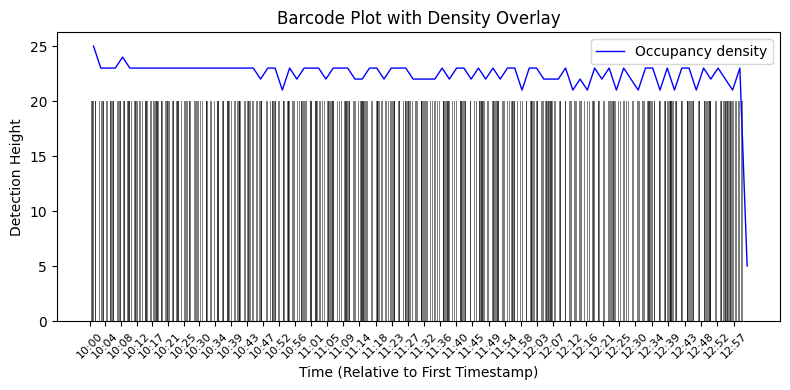

In [159]:
# Example usage:
t_start = '10:00'
t_finish = '13:00'
bar_w = 4
xticks = 50
chunk = 120  # Density chunk size in seconds

plot_barcodes_with_density(
    './22_MC8timestamps.txt', 
    bar_width=bar_w, 
    xtick_interval=xticks, 
    chunk_size=chunk, 
    start_time=t_start, 
    end_time=t_finish
)


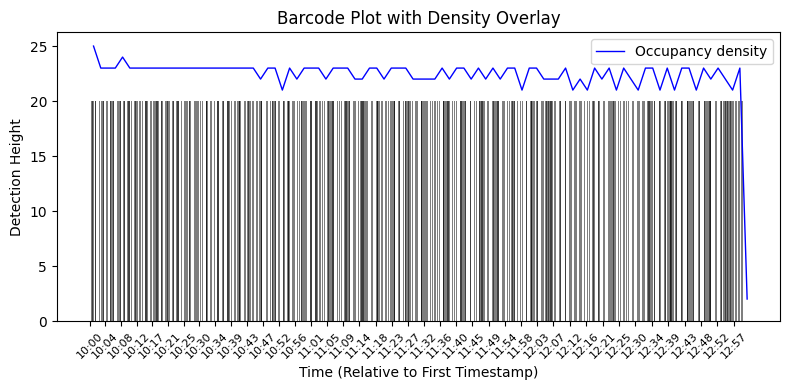

In [158]:
plot_barcodes_with_density(
    './22_MG8timestamps.txt', 
    bar_width=bar_w, 
    xtick_interval=xticks, 
    chunk_size=chunk, 
    start_time=t_start, 
    end_time=t_finish
)

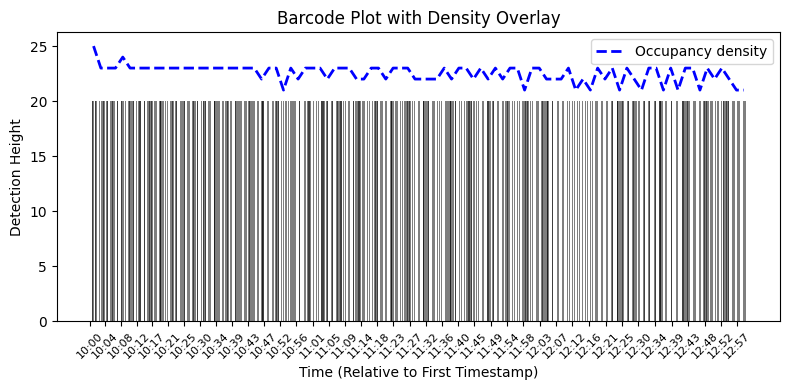

In [155]:
plot_barcodes_with_density(
    './22_ME2timestamps.txt', 
    bar_width=bar_w, 
    xtick_interval=xticks, 
    chunk_size=chunk, 
    start_time=t_start, 
    end_time=t_finish
)

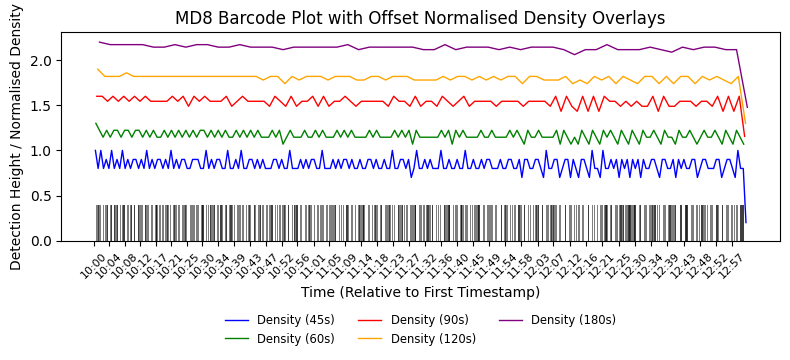

In [205]:
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import cycle

def plot_barcodes_with_multiple_densities(
    file_path, 
    bar_width=4, 
    height=20, 
    xtick_interval=50, 
    chunk_sizes=[10, 20, 30, 60, 120, 180, 300, 600], 
    start_time=None, 
    end_time=None
):
    """
    Plot barcodes with actual spacing between timestamps and overlay multiple normalised densities.

    Parameters:
        file_path (str): Path to the text file containing UNIX timestamps.
        bar_width (float): Width of the vertical bars.
        height (float): Height of the barcode bars.
        xtick_interval (int): Interval between x-ticks on the plot.
        chunk_sizes (list[int]): List of chunk sizes (in seconds) for density calculations.
        start_time (str): Start time in HH:MM format to filter timestamps (e.g., '10:00').
        end_time (str): End time in HH:MM format to filter timestamps (e.g., '13:00').
    """
    # Load timestamps from file
    with open(file_path, 'r') as file:
        timestamps = [float(line.strip()) for line in file if line.strip()]

    # Convert timestamps to readable time (HH:MM)
    readable_times = [datetime.utcfromtimestamp(ts).strftime('%H:%M') for ts in timestamps]

    # Filter timestamps based on the provided time range
    if start_time and end_time:
        start_datetime = datetime.strptime(start_time, '%H:%M')
        end_datetime = datetime.strptime(end_time, '%H:%M')
        filtered_indices = [
            i for i, t in enumerate(readable_times)
            if start_datetime <= datetime.strptime(t, '%H:%M') <= end_datetime
        ]
        timestamps = [timestamps[i] for i in filtered_indices]
        readable_times = [readable_times[i] for i in filtered_indices]

    # Normalise timestamps to start from 0
    min_timestamp = min(timestamps) if timestamps else 0
    normalised_timestamps = [ts - min_timestamp for ts in timestamps]

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 4))

    # Plot the barcodes
    for ts in normalised_timestamps:
        ax.bar(ts, height, width=bar_width, align='center', color='black', alpha=0.5)

    # Overlay densities for multiple chunk sizes
    colors = cycle(['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'brown'])
    y_offset = 0.3  # Fixed offset between each density line
    for idx, chunk_size in enumerate(chunk_sizes):
        overlay_density_alt(
            ax, 
            timestamps=normalised_timestamps, 
            timeboundaries=(0, max(normalised_timestamps) if timestamps else 0), 
            chunk_size=chunk_size, 
            label=f'Density ({chunk_size}s)', 
            color=next(colors), 
            normalise=True, 
            y_offset=idx * y_offset
        )

    # Adjust x-ticks dynamically
    xtick_positions = normalised_timestamps[::xtick_interval] if xtick_interval > 0 else normalised_timestamps
    xtick_labels = readable_times[::xtick_interval] if xtick_interval > 0 else readable_times
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(xtick_labels, rotation=45, fontsize=8)

    # Adding labels and title for clarity
    ax.set_title(file_path[5:8] + ' Barcode Plot with Offset Normalised Density Overlays')
    ax.set_xlabel('Time (Relative to First Timestamp)')
    ax.set_ylabel('Detection Height / Normalised Density')

    # Move legend below the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize='small', frameon=False)

    # Show the plot
    plt.tight_layout()
    plt.show()

def overlay_density_alt(ax, timestamps, timeboundaries, chunk_size=20, label='Occupancy density', color='blue', normalise=False, y_offset=0):
    """
    Overlay a density lineplot on the given axis based on timestamps within specified timeboundaries.

    Args:
        ax: Matplotlib axis to overlay the density plot.
        timestamps: List or array of timestamps to calculate density.
        timeboundaries: Tuple of (start_time, end_time) for the x-axis.
        chunk_size: Size of time chunks (in seconds) for density calculation.
        label: Label for the density plot in the legend.
        color: Line color for the density plot.
        normalise: Whether to normalise the density values between 0 and 1.
        y_offset: Fixed offset to apply to the y-values for the density line.
    """
    # Sort the timestamps and initialize variables
    timestamps = sorted(timestamps)
    density_x = []
    density_y = []

    # Start from the first timestamp and chunk data
    start_time = timeboundaries[0]
    while start_time < timeboundaries[1]:
        end_time = start_time + chunk_size
        chunk_count = len([ts for ts in timestamps if start_time <= ts < end_time])
        density_x.append((start_time + end_time) / 2)  # Midpoint of the chunk
        density_y.append(chunk_count)
        start_time = end_time

    # Normalise the density values if required
    if normalise and density_y:
        max_density = max(density_y)
        if max_density > 0:
            density_y = [y / max_density for y in density_y]

    # Apply the y-offset
    density_y = [y + y_offset for y in density_y]

    # Plot the density
    ax.plot(density_x, density_y, color=color, label=label, linestyle='-', linewidth=1)

# Example usage:
t_start = '10:00'
t_finish = '13:00'
bar_w = 4
xticks = 50
chunk_sizes = [45, 60, 90, 120, 180]  # List of chunk sizes

plot_barcodes_with_multiple_densities(
    './22_MD8timestamps.txt', 
    bar_width=bar_w, 
    height=0.4, 
    xtick_interval=xticks, 
    chunk_sizes=chunk_sizes, 
    start_time=t_start, 
    end_time=t_finish
)


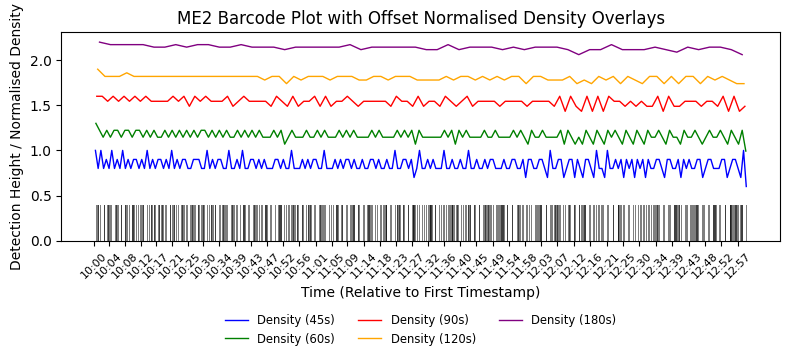

In [208]:
plot_barcodes_with_multiple_densities(
    './22_ME2timestamps.txt',
    bar_width=bar_w, 
    height=.4, 
    xtick_interval=xticks, 
    chunk_sizes=chunk_sizes, 
    start_time=t_start, 
    end_time=t_finish
)

In [230]:
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import cycle
import numpy as np

def plot_barcodes_with_multiple_densities(
    file_path, 
    bar_width=4, 
    height=20, 
    xtick_interval=50, 
    chunk_sizes=[10, 20, 30, 60, 120, 180, 300, 600], 
    start_time=None, 
    end_time=None
):
    """
    Plot barcodes with actual spacing between timestamps and overlay multiple normalised densities and volatility.

    Parameters:
        file_path (str): Path to the text file containing UNIX timestamps.
        bar_width (float): Width of the vertical bars.
        height (float): Height of the barcode bars.
        xtick_interval (int): Interval between x-ticks on the plot.
        chunk_sizes (list[int]): List of chunk sizes (in seconds) for density calculations.
        start_time (str): Start time in HH:MM format to filter timestamps (e.g., '10:00').
        end_time (str): End time in HH:MM format to filter timestamps (e.g., '13:00').
    """
    # Load timestamps from file
    with open(file_path, 'r') as file:
        timestamps = [float(line.strip()) for line in file if line.strip()]

    # Convert timestamps to readable time (HH:MM)
    readable_times = [datetime.utcfromtimestamp(ts).strftime('%H:%M') for ts in timestamps]

    # Filter timestamps based on the provided time range
    if start_time and end_time:
        start_datetime = datetime.strptime(start_time, '%H:%M')
        end_datetime = datetime.strptime(end_time, '%H:%M')
        filtered_indices = [
            i for i, t in enumerate(readable_times)
            if start_datetime <= datetime.strptime(t, '%H:%M') <= end_datetime
        ]
        timestamps = [timestamps[i] for i in filtered_indices]
        readable_times = [readable_times[i] for i in filtered_indices]

    # Normalise timestamps to start from 0
    min_timestamp = min(timestamps) if timestamps else 0
    normalised_timestamps = [ts - min_timestamp for ts in timestamps]

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the barcodes
    for ts in normalised_timestamps:
        ax.bar(ts, height, width=bar_width, align='center', color='black', alpha=0.5)

    # Overlay densities for multiple chunk sizes
    colors = cycle(['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'brown'])
    y_offset = 0.5  # Fixed offset between each density line
    for idx, chunk_size in enumerate(chunk_sizes):
        color = next(colors)
        overlay_density_alt(
            ax, 
            timestamps=normalised_timestamps, 
            timeboundaries=(0, max(normalised_timestamps) if timestamps else 0), 
            chunk_size=chunk_size, 
            label=f'Density ({chunk_size}s)', 
            color=color, 
            normalise=True, 
            y_offset=idx * y_offset
        )
        overlay_normalised_volatility(
            ax, 
            timestamps=normalised_timestamps, 
            timeboundaries=(0, max(normalised_timestamps) if timestamps else 0), 
            chunk_size=chunk_size, 
            color=color, 
            y_offset=(idx + 1) * y_offset + 0.3
        )

    # Adjust x-ticks dynamically
    xtick_positions = normalised_timestamps[::xtick_interval] if xtick_interval > 0 else normalised_timestamps
    xtick_labels = readable_times[::xtick_interval] if xtick_interval > 0 else readable_times
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(xtick_labels, rotation=45, fontsize=8)

    # Set y-axis limit
    ax.set_ylim(0, 3.5)

    # Adding labels and title for clarity
    ax.set_title(file_path[5:8] + ' Barcode Plot with Offset Normalised Density and Volatility Overlays')
    ax.set_xlabel('Time (Relative to First Timestamp)')
    ax.set_ylabel('Detection Height / Normalised Density')

    # Move legend below the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize='small', frameon=False)

    # Show the plot
    plt.tight_layout()
    plt.show()

def overlay_density_alt(ax, timestamps, timeboundaries, chunk_size=20, label='Occupancy density', color='blue', normalise=False, y_offset=0):
    """
    Overlay a density lineplot on the given axis based on timestamps within specified timeboundaries.

    Args:
        ax: Matplotlib axis to overlay the density plot.
        timestamps: List or array of timestamps to calculate density.
        timeboundaries: Tuple of (start_time, end_time) for the x-axis.
        chunk_size: Size of time chunks (in seconds) for density calculation.
        label: Label for the density plot in the legend.
        color: Line color for the density plot.
        normalise: Whether to normalise the density values between 0 and 1.
        y_offset: Fixed offset to apply to the y-values for the density line.
    """
    # Sort the timestamps and initialize variables
    timestamps = sorted(timestamps)
    density_x = []
    density_y = []

    # Start from the first timestamp and chunk data
    start_time = timeboundaries[0]
    while start_time < timeboundaries[1]:
        end_time = start_time + chunk_size
        chunk_count = len([ts for ts in timestamps if start_time <= ts < end_time])
        density_x.append((start_time + end_time) / 2)  # Midpoint of the chunk
        density_y.append(chunk_count)
        start_time = end_time

    # Normalise the density values if required
    if normalise and density_y:
        max_density = max(density_y)
        if max_density > 0:
            density_y = [y / max_density for y in density_y]

    # Apply the y-offset
    density_y = [y + y_offset for y in density_y]

    # Plot the density
    ax.plot(density_x, density_y, color=color, label=label, linestyle='-', linewidth=1)

def overlay_normalised_volatility(ax, timestamps, timeboundaries, chunk_size=20, color='blue', y_offset=0):
    """
    Overlay a normalized volatility lineplot on the given axis based on the absolute changes in density.

    Args:
        ax: Matplotlib axis to overlay the volatility plot.
        timestamps: List or array of timestamps to calculate density.
        timeboundaries: Tuple of (start_time, end_time) for the x-axis.
        chunk_size: Size of time chunks (in seconds) for density calculation.
        color: Line color for the volatility plot.
        y_offset: Fixed offset to apply to the y-values for the volatility plot.
    """
    # Sort the timestamps and initialize variables
    timestamps = sorted(timestamps)
    density_x = []
    density_y = []

    # Start from the first timestamp and chunk data
    start_time = timeboundaries[0]
    while start_time < timeboundaries[1]:
        end_time = start_time + chunk_size
        chunk_count = len([ts for ts in timestamps if start_time <= ts < end_time])
        density_x.append((start_time + end_time) / 2)  # Midpoint of the chunk
        density_y.append(chunk_count)
        start_time = end_time

    # Calculate volatility as the absolute difference
    volatility = np.abs(np.diff(density_y))
    if len(volatility) > 0:
        max_volatility = max(volatility)
        if max_volatility > 0:
            volatility = volatility / max_volatility  # Normalise volatility

    volatility_x = density_x[:-1]

    # Offset the volatility plot
    volatility = [v + y_offset for v in volatility]

    # Plot the volatility
    ax.plot(volatility_x, volatility, color=color, linestyle='dotted', linewidth=1, alpha=0.4, label=f'Volatility ({chunk_size}s)')

# Example usage:
t_start = '10:00'
t_finish = '13:00'
bar_w = 4
xticks = 50
chunk_sizes = [45, 60, 90, 120, 180]  # List of chunk sizes




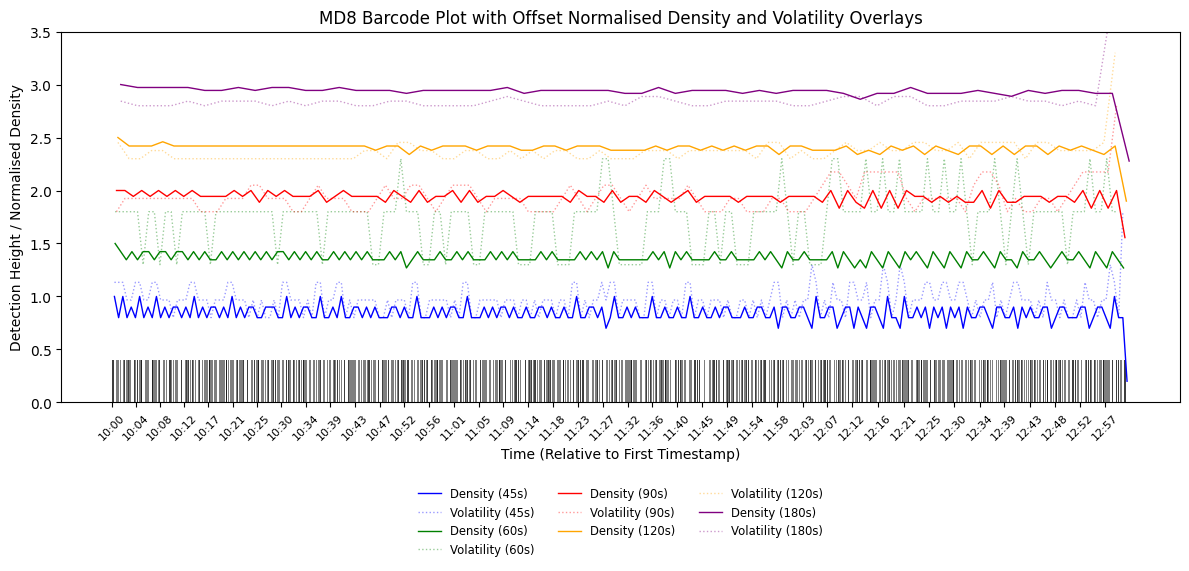

In [234]:
plot_barcodes_with_multiple_densities(
    './22_MD8timestamps.txt', 
    bar_width=bar_w, 
    height=0.4, 
    xtick_interval=xticks, 
    chunk_sizes=chunk_sizes, 
    start_time=t_start, 
    end_time=t_finish
)

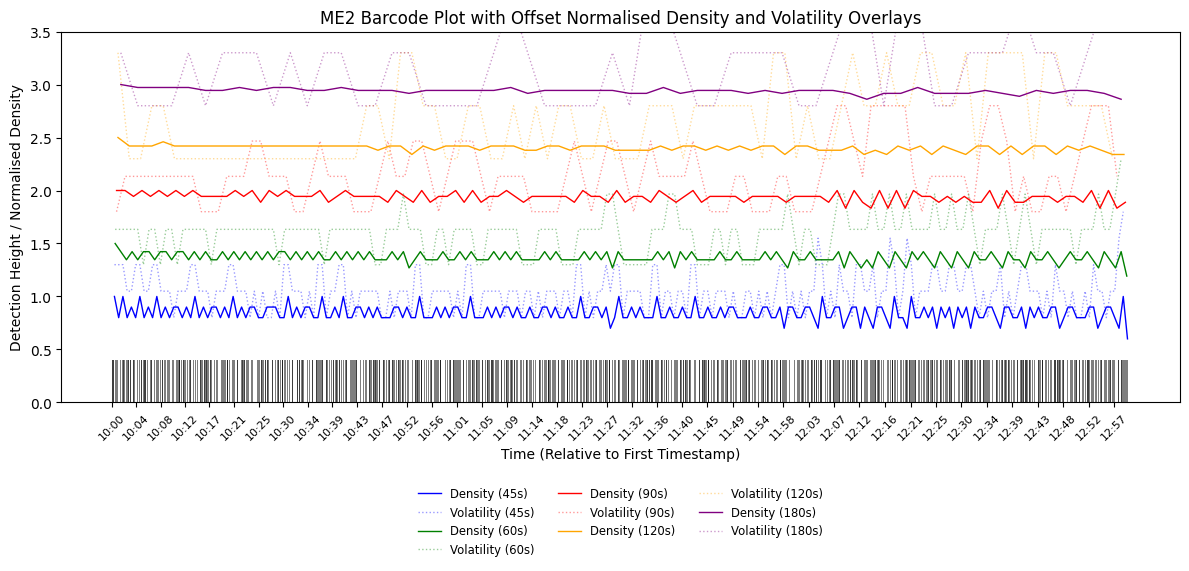

In [232]:
plot_barcodes_with_multiple_densities(
    './22_ME2timestamps.txt', 
    bar_width=bar_w, 
    height=0.4, 
    xtick_interval=xticks, 
    chunk_sizes=chunk_sizes, 
    start_time=t_start, 
    end_time=t_finish
)


In [263]:
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import cycle
import numpy as np

def plot_barcodes_with_multiple_densities(
    file_path, 
    bar_width=4, 
    height=20, 
    xtick_interval=50, 
    chunk_sizes=[10, 20, 30, 60, 120, 180, 300, 600],
    start_time=None, 
    end_time=None,
    window_size=4
):
    """
    Plot seat barcodes, overlay multiple normalised densities, and show a variance timeseries.

    Parameters:
        file_path (str): Path to the text file containing UNIX timestamps.
        bar_width (float): Width of the vertical bars.
        height (float): Height of the barcode bars.
        xtick_interval (int): Interval between x-ticks on the plot.
        chunk_sizes (list[int]): List of chunk sizes (in seconds) for density calculations.
        start_time (str): Start time in HH:MM format to filter timestamps (e.g., '10:00').
        end_time (str): End time in HH:MM format to filter timestamps (e.g., '13:00').
        window_size (int): The number of chunks over which to compute the rolling variance.
    """
    # Load timestamps
    with open(file_path, 'r') as file:
        timestamps = [float(line.strip()) for line in file if line.strip()]

    # Convert timestamps to readable time (HH:MM)
    readable_times = [datetime.utcfromtimestamp(ts).strftime('%H:%M') for ts in timestamps]

    # Filter timestamps based on start/end time if provided
    if start_time and end_time:
        start_datetime = datetime.strptime(start_time, '%H:%M')
        end_datetime = datetime.strptime(end_time, '%H:%M')
        filtered_indices = [
            i for i, t in enumerate(readable_times)
            if start_datetime <= datetime.strptime(t, '%H:%M') <= end_datetime
        ]
        timestamps = [timestamps[i] for i in filtered_indices]
        readable_times = [readable_times[i] for i in filtered_indices]

    # Normalise timestamps to start from 0
    min_timestamp = min(timestamps) if timestamps else 0
    normalised_timestamps = [ts - min_timestamp for ts in timestamps]

    # Create the plot
    fig, ax = plt.subplots(figsize=(9, 5))

    # Plot barcode lines for each timestamp
    for ts in normalised_timestamps:
        ax.bar(ts, height, width=bar_width, align='center', color='black', alpha=0.5)

    # Colours cycle for different chunk sizes
    colors = cycle(['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'brown'])
    y_offset = 0.5

    # Overlay densities and variance timeseries for each chunk size
    for idx, chunk_size in enumerate(chunk_sizes):
        color = next(colors)

        # Overlay density line
        overlay_density_alt(
            ax, 
            timestamps=normalised_timestamps, 
            timeboundaries=(0, max(normalised_timestamps) if timestamps else 0), 
            chunk_size=chunk_size, 
            label=f'Density ({chunk_size}s)', 
            color=color, 
            normalise=True, 
            y_offset=idx * y_offset
        )

        # Overlay variance timeseries line
        overlay_variance_timeseries(
            ax, 
            timestamps=normalised_timestamps,
            timeboundaries=(0, max(normalised_timestamps) if timestamps else 0), 
            chunk_size=chunk_size, 
            color=color, 
            y_offset=(idx + 1)*y_offset + 0.3,
            window_size=window_size
        )

    # Adjust x-ticks
    xtick_positions = normalised_timestamps[::xtick_interval] if xtick_interval > 0 else normalised_timestamps
    xtick_labels = readable_times[::xtick_interval] if xtick_interval > 0 else readable_times
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(xtick_labels, rotation=45, fontsize=8)

    # Set y-axis limit (adjust as needed)
    ax.set_ylim(0, 3.5)

    # Add labels and title
    if file_path:
        title_str = file_path[5:8] 
    else:
        title_str = ''
    ax.set_title(title_str + ' Barcode Plot with Normalised Density and Variance Timeseries')
    ax.set_xlabel('Time (Relative to First Timestamp)')
    ax.set_ylabel('Density / Variance Level')

    # Move legend below the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize='small', frameon=False)

    plt.tight_layout()
    plt.show()

def overlay_density_alt(ax, timestamps, timeboundaries, chunk_size=20, label='Occupancy density', color='blue', normalise=False, y_offset=0):
    """
    Overlay a density line plot for a given chunk size.
    """
    timestamps = sorted(timestamps)
    density_x = []
    density_y = []

    start_time = timeboundaries[0]
    while start_time < timeboundaries[1]:
        end_time = start_time + chunk_size
        chunk_count = len([ts for ts in timestamps if start_time <= ts < end_time])
        density_x.append((start_time + end_time) / 2)
        density_y.append(chunk_count)
        start_time = end_time

    if normalise and density_y:
        max_density = max(density_y)
        if max_density > 0:
            density_y = [dy/max_density for dy in density_y]

    density_y = [dy + y_offset for dy in density_y]

    ax.plot(density_x, density_y, color=color, label=label, linestyle='-', linewidth=1)

def overlay_variance_timeseries(ax, timestamps, timeboundaries, chunk_size=20, color='blue', y_offset=0, window_size=5):
    """
    Compute a variance timeseries by calculating variance over a rolling window of chunks.
    This produces multiple data points, forming a timeseries line of variance over time.
    """
    timestamps = sorted(timestamps)
    density_x = []
    density_y = []

    # Break the entire time range into chunks
    start_time = timeboundaries[0]
    while start_time < timeboundaries[1]:
        end_time = start_time + chunk_size
        chunk_count = len([ts for ts in timestamps if start_time <= ts < end_time])
        density_x.append((start_time + end_time) / 2)  # midpoint of chunk
        density_y.append(chunk_count)
        start_time = end_time

    # Optional normalization of density if desired:
    # max_density = max(density_y) if density_y else 1
    # density_y = [dy/max_density for dy in density_y]

    variance_x = []
    variance_values = []

    # Compute rolling variance over 'window_size' chunks
    for i in range(len(density_y) - window_size + 1):
        window = density_y[i:i+window_size]
        var = np.var(window)
        mid_x = np.mean(density_x[i:i+window_size])
        variance_values.append(var + y_offset)
        variance_x.append(mid_x)

    # Plot variance timeseries
    if variance_x and variance_values:
        ax.plot(variance_x, variance_values, color=color, linestyle='--', linewidth=1.5, alpha=0.8, label=f'Variance TS ({chunk_size}s)')
    return variance_x, variance_values



Explanation:
overlay_density_alt: Plots a normalized density line for each chunk.
overlay_variance_timeseries: Uses a window_size to compute a rolling variance over the density values of consecutive chunks. This produces multiple data points and thus a timeseries of variance, resulting in a line plotted over time.
The main function plots both density lines (for multiple chunk_sizes) and the variance timeseries lines, resulting in a comprehensive visualisation of how density and variance (noise/volatility) evolve over time.

The length of the rolling variance is determined by the window size you choose. In the example code, window_size=5 means that each variance value is computed over 5 consecutive chunks of data. You can adjust this window size based on how much smoothing or detail you want in the variance timeseries

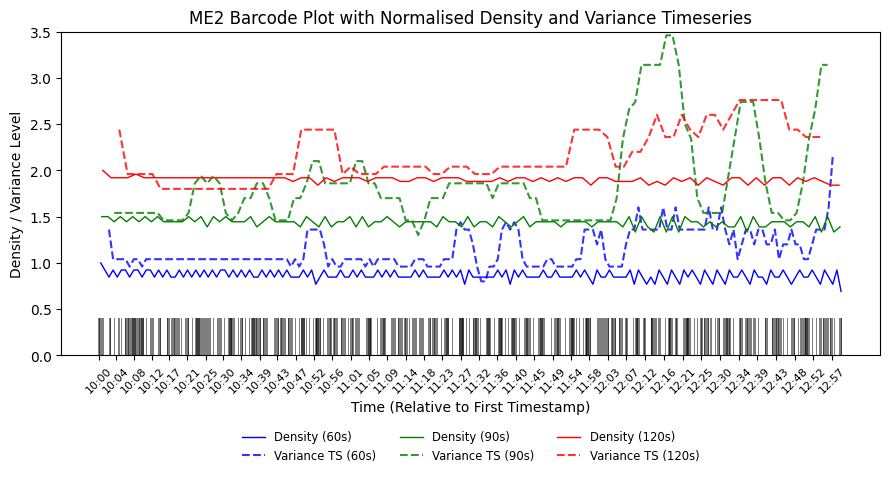

In [264]:
plot_barcodes_with_multiple_densities(
    './22_ME2timestamps.txt', 
    bar_width=bar_w, 
    height=0.4, 
    xtick_interval=xticks, 
    chunk_sizes=chunk_sizes, 
    start_time=t_start, 
    end_time=t_finish,
    window_size=5
)

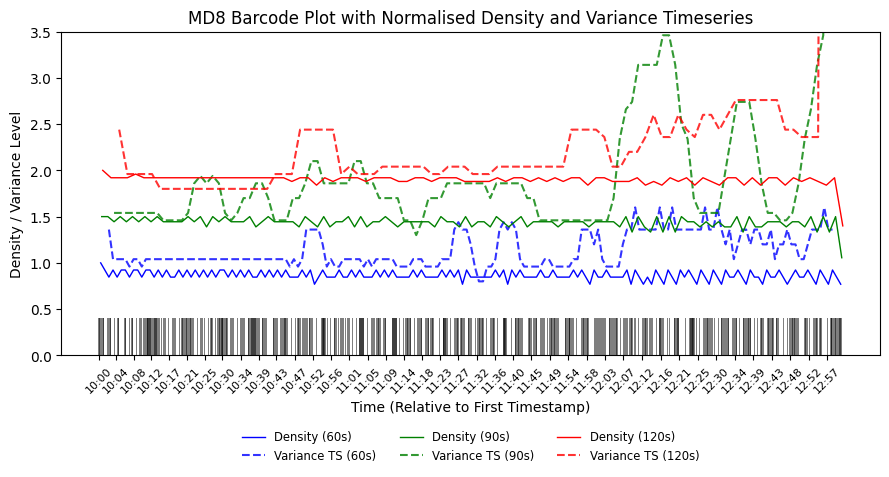

In [265]:
# Example usage:
t_start = '10:00'
t_finish = '13:00'
bar_w = 4
xticks = 50
# chunk_sizes = [45, 60, 90, 120]
chunk_sizes = [60, 90, 120]

plot_barcodes_with_multiple_densities(
    './22_MD8timestamps.txt', 
    bar_width=bar_w, 
    height=0.4, 
    xtick_interval=xticks, 
    chunk_sizes=chunk_sizes, 
    start_time=t_start, 
    end_time=t_finish,
    window_size=5
)



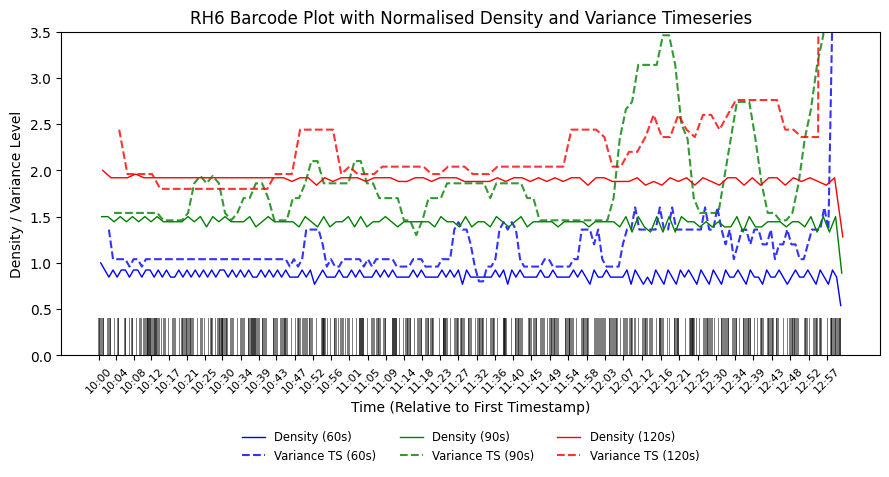

In [266]:
plot_barcodes_with_multiple_densities(
    './22_RH6timestamps.txt', 
    bar_width=bar_w, 
    height=0.4, 
    xtick_interval=xticks, 
    chunk_sizes=chunk_sizes, 
    start_time=t_start, 
    end_time=t_finish,
    window_size=5
)

In [309]:
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import cycle
import numpy as np
import os

def overlay_density_alt(ax, timestamps, timeboundaries, chunk_size=20, label='Occupancy density', color='blue', normalise=False, y_offset=0):
    timestamps = sorted(timestamps)
    density_x = []
    density_y = []

    start_time = timeboundaries[0]
    while start_time < timeboundaries[1]:
        end_time = start_time + chunk_size
        chunk_count = len([ts for ts in timestamps if start_time <= ts < end_time])
        density_x.append((start_time + end_time) / 2)
        density_y.append(chunk_count)
        start_time = end_time

    if normalise and density_y:
        max_density = max(density_y)
        if max_density > 0:
            density_y = [dy/max_density for dy in density_y]

    density_y = [dy + y_offset for dy in density_y]

    ax.plot(density_x, density_y, color=color, label=label, linestyle='-', linewidth=1)


def overlay_variance_timeseries(ax, timestamps, timeboundaries, chunk_size=20, color='blue', y_offset=0, window_size=5):
    timestamps = sorted(timestamps)
    density_x = []
    density_y = []

    start_time = timeboundaries[0]
    while start_time < timeboundaries[1]:
        end_time = start_time + chunk_size
        chunk_count = len([ts for ts in timestamps if start_time <= ts < end_time])
        density_x.append((start_time + end_time) / 2)
        density_y.append(chunk_count)
        start_time = end_time

    variance_x = []
    variance_values = []

    for i in range(len(density_y) - window_size + 1):
        window = density_y[i:i+window_size]
        var = np.var(window)
        mid_x = np.mean(density_x[i:i+window_size])
        variance_values.append(var + y_offset)
        variance_x.append(mid_x)

    if variance_x and variance_values:
        ax.plot(variance_x, variance_values, color=color, linestyle='--', linewidth=1.5, alpha=0.8, label=f'Variance TS ({chunk_size}s)')

    return variance_x, variance_values


def plot_multiple_seats_subplots(
    seats, 
    file_prefix='./22_', 
    file_suffix='timestamps.txt',
    bar_width=4, 
    height=20, 
    xtick_interval=50, 
    chunk_sizes=[10, 20, 30, 60, 120, 180, 300, 600],
    start_time=None, 
    end_time=None,
    window_size=4,
    x_plots=3, 
    y_plots=2, 
    isSaved=False, 
    save_path='multi_seat_plot.png',
    variance=True,
    density=True
):
    """
    Creates a multi-subplot figure, each subplot based on the logic of plot_barcodes_with_multiple_densities,
    and only one legend at the very bottom of the plot.
    """

    fig, axs = plt.subplots(y_plots, x_plots, figsize=(18, 12))
    fig.tight_layout(pad=10, w_pad=15, h_pad=10)

    num_subplots = x_plots * y_plots
    seats_to_plot = seats[:num_subplots]

    # We'll store all legend entries here
    all_handles = []
    all_labels = []

    for ax, seat in zip(axs.flatten(), seats_to_plot):
        file_path = f"{file_prefix}{seat}{file_suffix}"
        if not os.path.exists(file_path):
            ax.set_title(f"{seat}: file not found")
            ax.axis('off')
            continue

        # Load timestamps
        with open(file_path, 'r') as file:
            timestamps = [float(line.strip()) for line in file if line.strip()]

        readable_times = [datetime.utcfromtimestamp(ts).strftime('%H:%M') for ts in timestamps]

        # Filter by start/end time if needed
        if start_time and end_time:
            start_dt = datetime.strptime(start_time, '%H:%M')
            end_dt = datetime.strptime(end_time, '%H:%M')
            filtered_indices = [
                i for i, t in enumerate(readable_times)
                if start_dt <= datetime.strptime(t, '%H:%M') <= end_dt
            ]
            timestamps = [timestamps[i] for i in filtered_indices]
            readable_times = [readable_times[i] for i in filtered_indices]

        # Normalize timestamps
        min_timestamp = min(timestamps) if timestamps else 0
        normalised_timestamps = [ts - min_timestamp for ts in timestamps]

        # Plot barcode lines
        for ts in normalised_timestamps:
            ax.bar(ts, height, width=bar_width, align='center', color='black', alpha=0.5)

        # Colors for different chunk sizes
        colors = cycle(['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'brown'])
        y_offset = 0.6

        timeboundaries = (0, max(normalised_timestamps) if normalised_timestamps else 0)

        # Each chunk size plots density and variance lines
        # We do not call legend yet, we'll gather them after
        for idx, chunk_size in enumerate(chunk_sizes):
            color = next(colors)
            before_handles, before_labels = ax.get_legend_handles_labels()
            
            if(density):
                overlay_density_alt(
                    ax, 
                    timestamps=normalised_timestamps, 
                    timeboundaries=timeboundaries, 
                    chunk_size=chunk_size, 
                    label=f'Density ({chunk_size}s)', 
                    color=color, 
                    normalise=True, 
                    y_offset=idx * y_offset
                )
            if (variance):
                overlay_variance_timeseries(
                    ax, 
                    timestamps=normalised_timestamps,
                    timeboundaries=timeboundaries, 
                    chunk_size=chunk_size, 
                    color=color, 
                    y_offset=(idx + 1)*y_offset-0.2,
                    window_size=window_size
                )
            after_handles, after_labels = ax.get_legend_handles_labels()

            # Extract only new labels that appeared after plotting to avoid duplicates
            new_handles = [h for h in after_handles if h not in before_handles]
            new_labels = [l for i,l in enumerate(after_labels) if after_handles[i] not in before_handles]

            # Collect them in global lists
            all_handles.extend(new_handles)
            all_labels.extend(new_labels)

        # Setup x-ticks
        xtick_positions = normalised_timestamps[::xtick_interval] if xtick_interval > 0 and normalised_timestamps else normalised_timestamps
        if xtick_positions:
            indices = []
            for xp in xtick_positions:
                closest_i = np.argmin([abs(t - xp) for t in normalised_timestamps])
                indices.append(closest_i)
            xtick_labels = [readable_times[i] for i in indices if i < len(readable_times)]
        else:
            xtick_labels = []

        ax.set_xticks(xtick_positions)
        ax.set_xticklabels(xtick_labels, rotation=45, fontsize=8)

        ax.set_ylim(0, 3.5)

        if (variance):
            ax.set_title(f'{seat} Barcode + Variance')
        if (density):
            ax.set_title(f'{seat} Barcode + Density')
        if (density and variance):
            ax.set_title(f'{seat} Barcode + Variance/Density')

        ax.set_xlabel('Time (Relative)')
        ax.set_ylabel('Density / Variance Level')

    # Hide unused axes if seats < num_subplots
    if len(seats_to_plot) < num_subplots:
        for ax in axs.flatten()[len(seats_to_plot):]:
            ax.axis('off')

    # Create a unique set of labels to avoid duplicates
    unique_handles_labels = dict(zip(all_labels, all_handles))
    unique_labels = list(unique_handles_labels.keys())
    unique_handles = [unique_handles_labels[l] for l in unique_labels]

    # Add one global legend at the bottom
    fig.legend(unique_handles, unique_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize='small', frameon=False)

    plt.tight_layout(rect=[0,0.1,1,1])  # Adjust rect so legend fits below

    if isSaved:
        plt.savefig(save_path, format='png')
    else:
        plt.show()

# Example usage (uncomment to run):
# seats = ["RH6", "RH8", "RH9", "RH10", "MH3", "LB1"]
# plot_multiple_seats_subplots(
#     seats=seats, 
#     start_time='10:00', 
#     end_time='13:00', 
#     chunk_sizes=[45,60,90,120,180], 
#     window_size=4,
#     x_plots=3, 
#     y_plots=2,
#     isSaved=False
# )


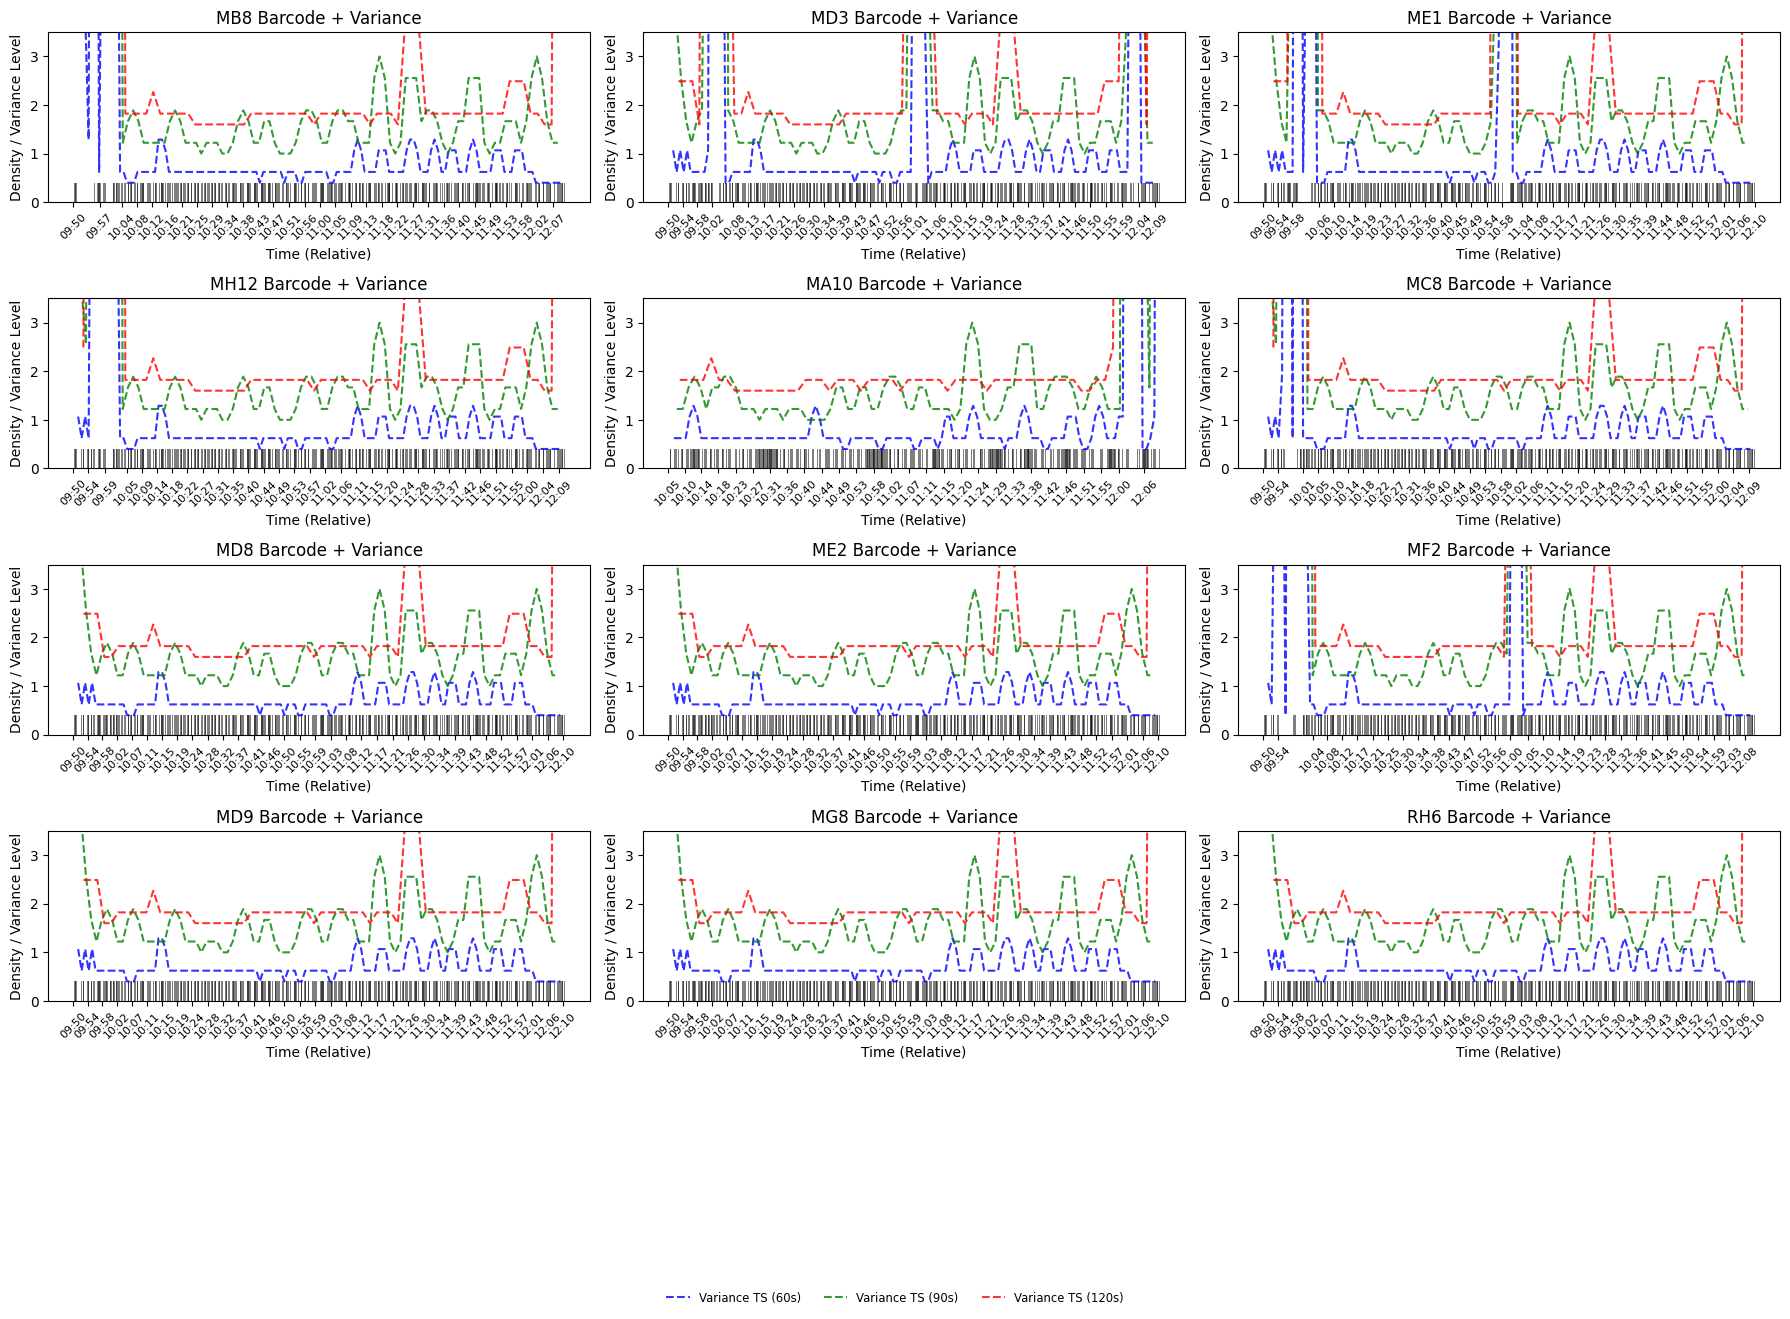

In [315]:

# Example usage:
seats = ["MB8","MD3","ME1","MH12", "MA10","MC8","MD8","ME2","MF2","MD9","MG8","RH6" ]
plot_multiple_seats_subplots(
    seats=seats, 
    # start_time='10:00', 
    # end_time='13:00',
    start_time='9:50', 
    end_time='12:10', 
    chunk_sizes=[60,90,120], 
    bar_width=bar_w, 
    height=0.4, 
    window_size=3,
    x_plots=3, 
    y_plots=4,
    isSaved=False,
    variance=True,
    density=False
)

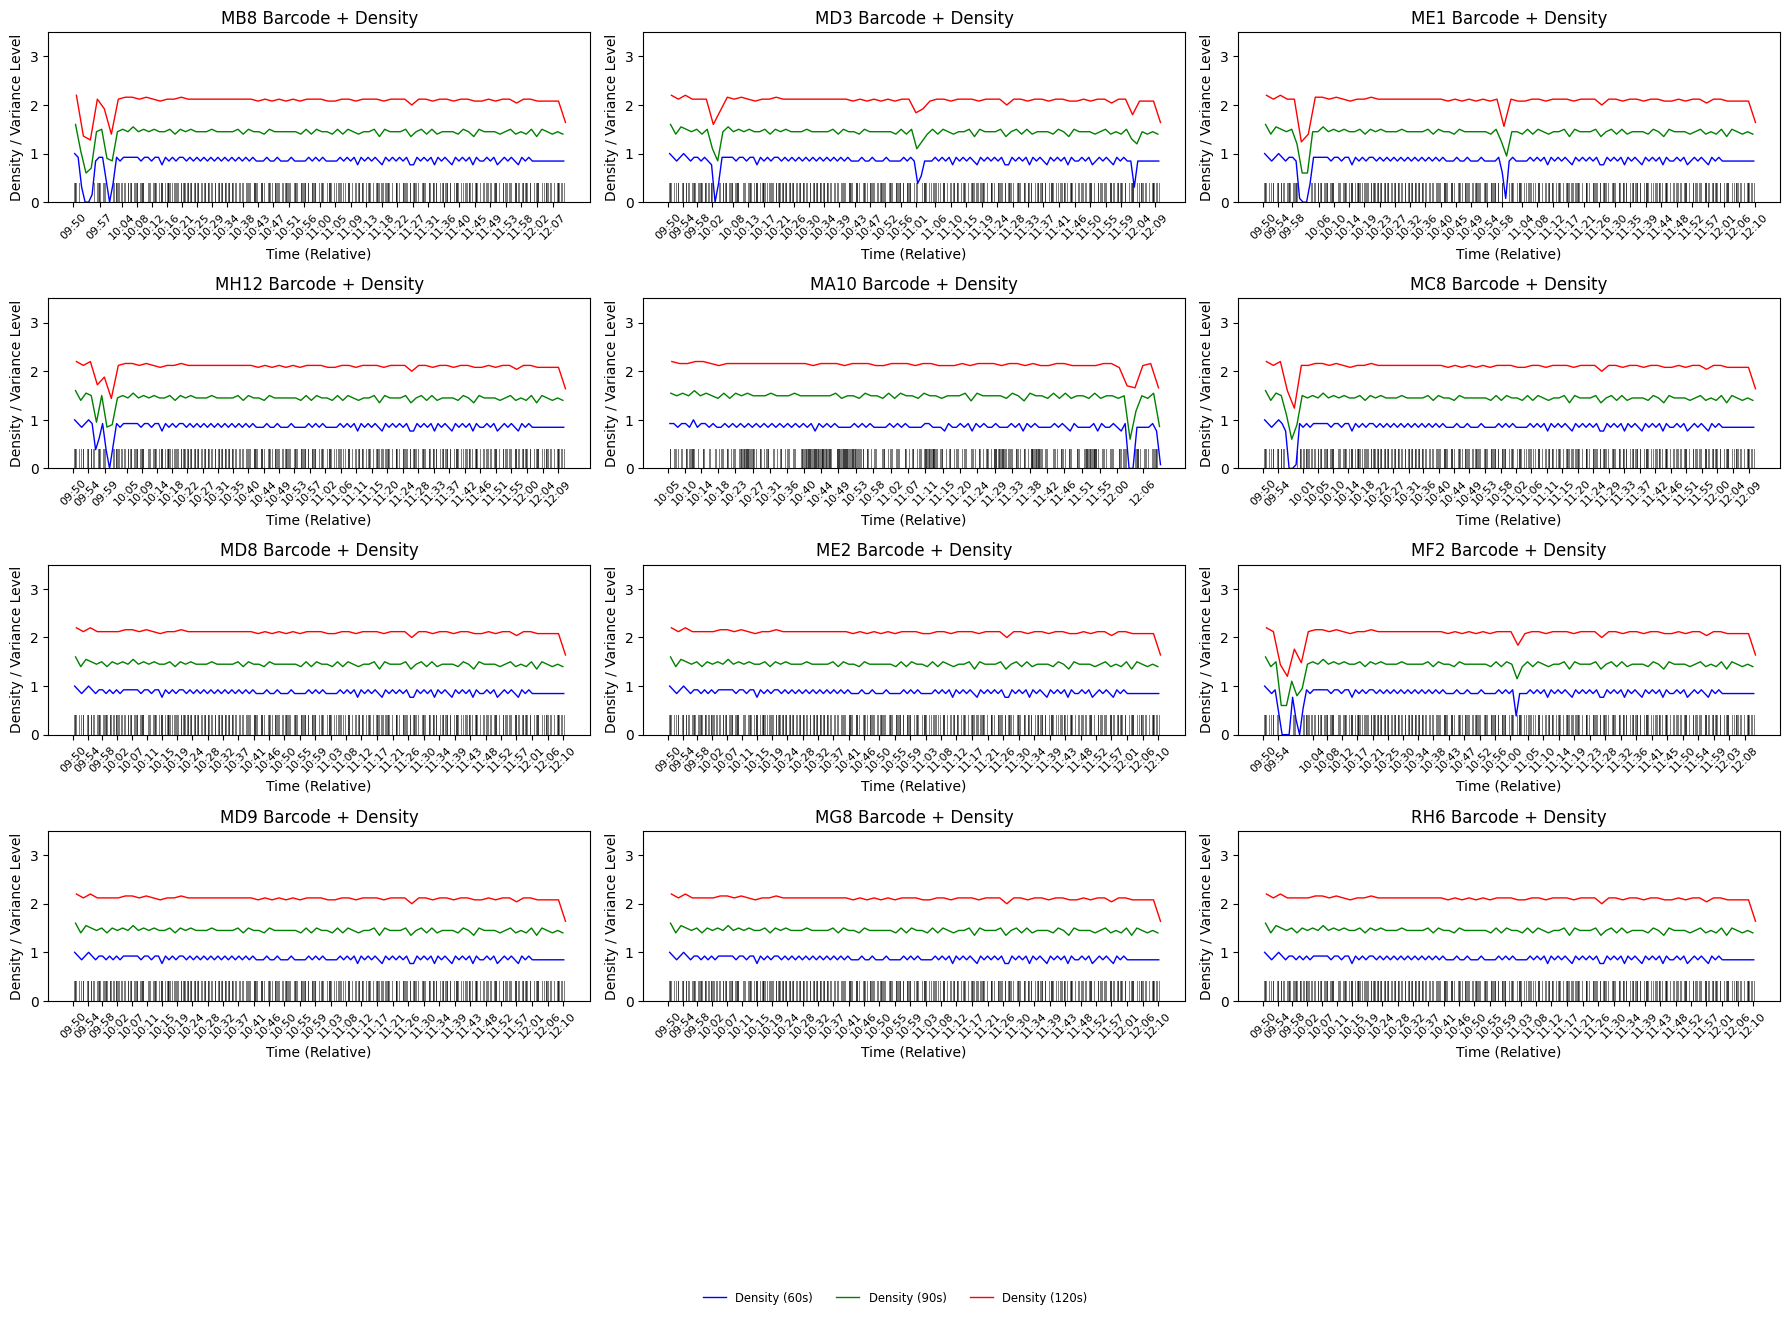

In [312]:
# Example usage:
seats = ["MB8","MD3","ME1","MH12", "MA10","MC8","MD8","ME2","MF2","MD9","MG8","RH6" ]
plot_multiple_seats_subplots(
    seats=seats, 
    # start_time='10:00', 
    # end_time='13:00',
    start_time='9:50', 
    end_time='12:10', 
    chunk_sizes=[60,90,120], 
    bar_width=bar_w, 
    height=0.4, 
    window_size=4,
    x_plots=3, 
    y_plots=4,
    isSaved=False,
    variance=False,
    density=True
)

In [ ]:
 "LL5","MB8","MD3","ME1","MF13","MH12" 
 "MA10","MC8","MD8","ME2","MF2","RF1" 
 "MB10","MC9","MD9","ME9","MG8","RH6" 

In [ ]:
 "LL5","MB8","MD3","ME1","MF13","MH12" 